# QuantomeRedNet

<p style='text-align: justify;'> 
Metabolic networks, which consist of interconnected biochemical reactions within an organism's cells, play a fundamental role in cellular metabolism. These networks encompass all metabolic pathways, driving energy production, nutrient utilization, biosynthesis, and molecule breakdown. Represented as nodes and edges, they offer a systems-level perspective on the intricate web of biochemical interactions. In the interdisciplinary field of Systems Biology, metabolic networks hold a central position. Systems Biology aims to unravel the complexity of biological systems by integrating biology, computer science, and mathematics. Through the analysis of metabolic networks, researchers gain insights into the dynamic behavior, regulatory mechanisms, and emergent properties of these systems. Computational modeling and simulations based on metabolic networks provide powerful tools for understanding and predicting cellular behavior.
</p> 
<p style='text-align: justify;'> 
To address the computational challenges posed by large-scale metabolic networks, researchers employ metabolic network reductions. One key concept and method for network reductions is Flux Coupling Analysis. Flux Coupling Analysis identifies sets of reactions in the network that are highly coupled, meaning that the flux through one reaction necessitates the flux through another reaction. By removing reactions within these coupled sets, nonessential or redundant components can be pruned from the network while preserving its essential functionality. These reduction methods further enhance computational efficiency, facilitate the identification of key regulatory mechanisms, and enable the design of metabolic engineering strategies and drug discovery.
</p>
<p style='text-align: justify;'> 
In conclusion, metabolic networks are pivotal to understanding cellular metabolism, and their analysis lies at the heart of Systems Biology. Through metabolic network reductions, including Flux Coupling Analysis, researchers can simplify complex networks, improving computational efficiency and enabling a focused exploration of core functionalities. By harnessing the power of reduced networks, researchers gain deeper insights into cellular metabolism, uncover regulatory mechanisms, and advance applications in biotechnology and medicine.
</p>

## COBRA

<p style='text-align: justify;'> 
COBRA is a widely used approach for the construction and analysis of genome-scale metabolic models. These models integrate biochemical, genetic, and genomic information to provide a comprehensive representation of cellular metabolism. In COBRA modeling, the metabolic network is represented as a system of biochemical reactions and associated constraints. These constraints include mass balance equations, thermodynamic constraints, and other physiological constraints. The mass balance equations ensure that the production and consumption of metabolites are balanced within the network, while the thermodynamic constraints consider the directionality of reactions based on thermodynamic feasibility.
</p>
<p style='text-align: justify;'> 
COBRA models are formulated as mathematical optimization problems, typically using linear programming (LP) or mixed-integer linear programming (MILP) techniques. The objective of these models is to maximize or minimize a specific cellular objective function, such as biomass production, ATP generation, or the secretion of a desired product. By optimizing the objective function subject to the constraints, COBRA models can predict metabolic flux distributions and provide insights into cellular behavior.
</p>

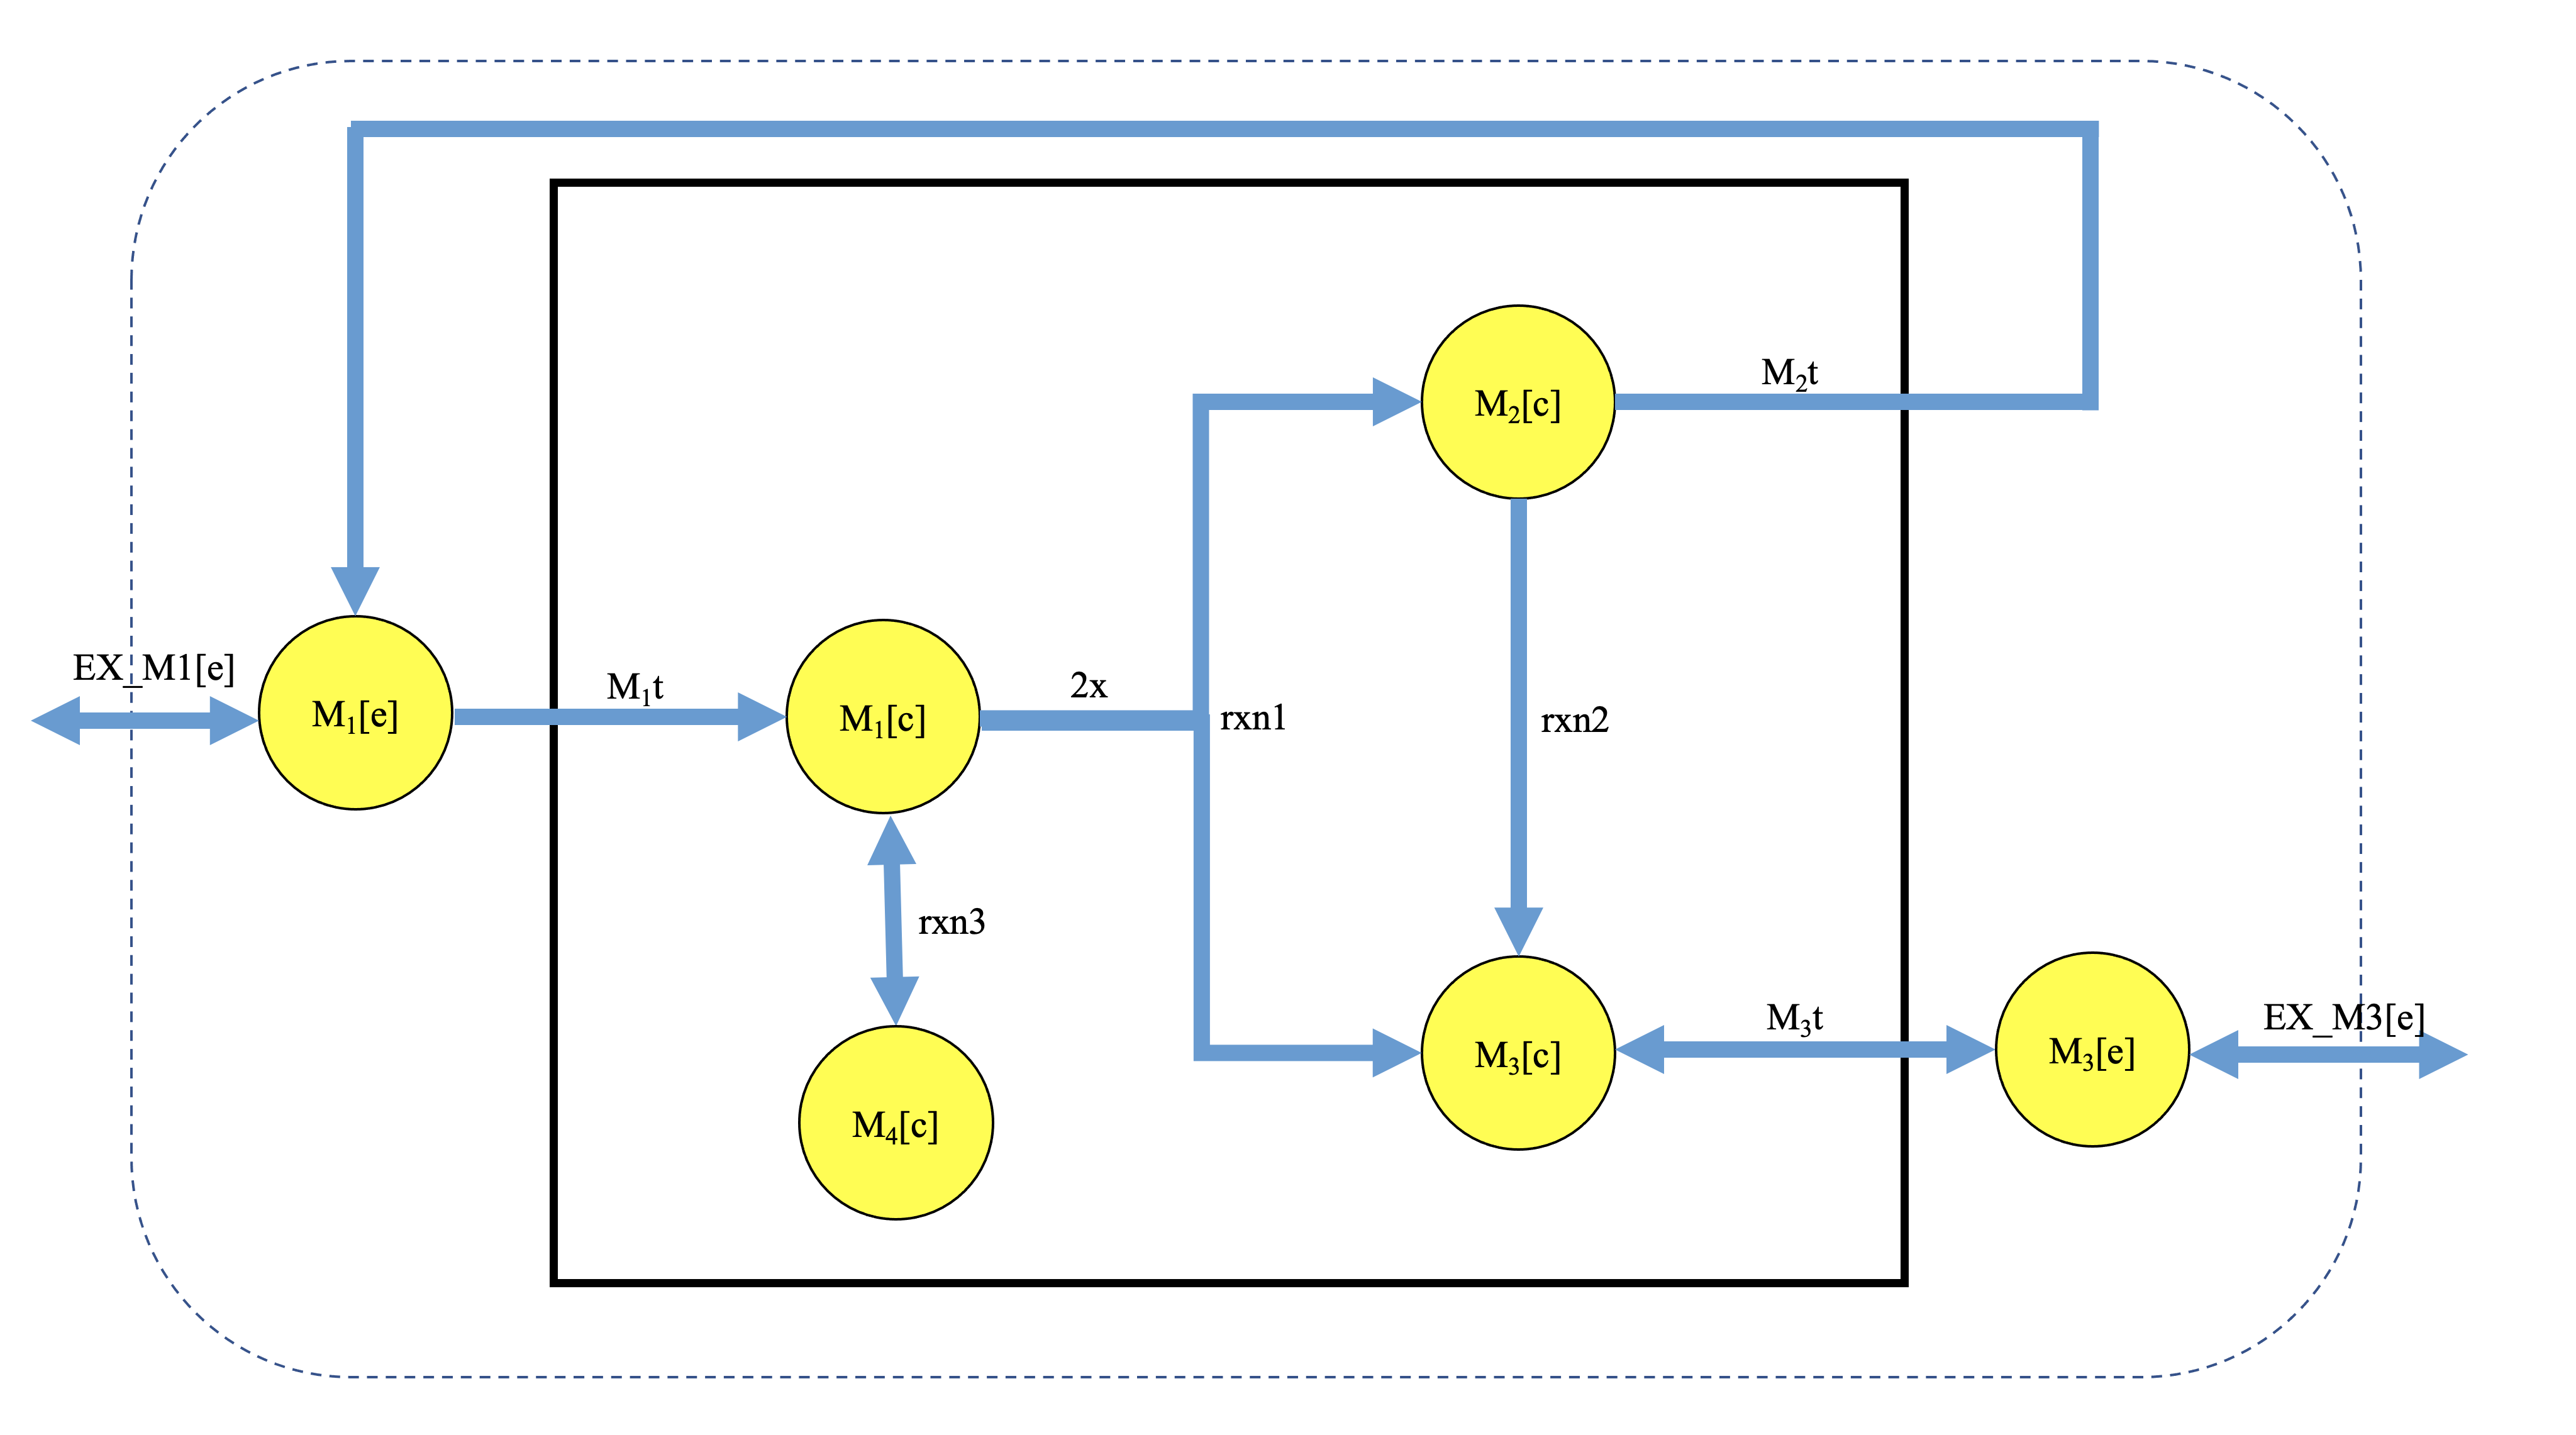

## Add worker processes and Import Packages 

<p style='text-align: justify;'>
Distributed programming is a programming paradigm that involves distributing the execution of a program across multiple processors or machines, enabling parallel execution of tasks and improving the efficiency of large-scale computations and data analysis. In Julia, the <code>addprocs()</code> function plays a key role in facilitating distributed programming by adding additional worker processes to a session. By calling addprocs(n), where n represents the number of processes, new worker processes are created, which can be located on the same machine or distributed across multiple machines. This function, combined with Julia's Distributed module, provides powerful tools such as <code>@spawn</code>, <code>@distributed</code>, and <code>@everywhere</code> to distribute and coordinate computation among the workers. These macros, combined with <code>addprocs()</code>, enable efficient utilization of distributed resources for parallel execution. They allow developers to divide tasks into smaller units and distribute them across multiple worker processes, thereby improving performance, scalability, and resource utilization in computationally intensive applications.
</p>

In [1]:
using Distributed

# Add worker processes to the Julia distributed computing environment:
addprocs(7)
println("Number of Workers : $(nprocs())")

## Import modules

# A Toolkit of Functions for Preprocessing Metabolic Network Data:
include("../src/Pre_Processing/Pre_processing.jl")

# Identifying Blocked Reactions in a Metabolic Model using Convex Optimization(n_i + 2n_r LP):
include("../src/ConsistencyChecking/TheNaiveApproach.jl")

# Identifying blocked reactions in metabolic networks using Convex Optimization(1LP) and Gaussian Elimination:
@everywhere include("../src/ConsistencyChecking/SwiftCC.jl")

# Parallel computation of quantitative flux coupling using swiftCC algorithm and Gaussian Elimination:
@everywhere include("../src/QFCA/distributedQFCA.jl")

@everywhere include("../src/QuantomeRedNet/QuantomeReducer.jl")

# Import required Julia Libraries:
using .Pre_processing, .TheNaiveApproach, .SwiftCC, .DistributedQFCA, .QuantomeReducer, COBREXA, JuMP


Number of Workers : 8


## Model Construction and Modifications

In [2]:
model = StandardModel("ToyModel") 

Metabolic model of type StandardModel
sparse(Int64[], Int64[], Float64[], 0, 0)
Number of reactions: 0
Number of metabolites: 0


### Gene

<p style='text-align: justify;'> 
Genes, in the context of systems biology, are segments of DNA that contain instructions for producing proteins or RNA molecules. They are fundamental units of heredity and play a vital role in encoding the enzymes and transporters involved in cellular metabolism. Genes are associated with specific metabolic functions, and their presence or absence can impact the production or activity of the corresponding enzymes. Including gene information in metabolic models allows for a comprehensive representation of cellular metabolism, linking genetic factors to metabolic function. This integration provides insights into the relationship between genes and cellular metabolism, facilitating the study of genetic perturbations and their effects on metabolic behavior.
</p>

#### Genes
G1, G2, G3, G4, G5, G6

In [3]:
gene_list = [Gene(string("G", num)) for num = 1:6]
add_genes!(model, gene_list)

### Metabolite

<p style='text-align: justify;'> 
Metabolism encompasses the complex network of biochemical processes occurring within cells. It involves the conversion of nutrients into energy, the synthesis of biomolecules, and the maintenance of cellular functions. Metabolic pathways, such as glycolysis, the citric acid cycle, and fatty acid metabolism, are interconnected and regulate the flow of metabolites through various enzymatic reactions. Metabolic models, computational representations of these processes, capture the stoichiometry, directionality, and often the kinetics of the biochemical reactions involved. By simulating metabolic behavior under different conditions, these models provide a quantitative understanding of metabolic fluxes and help in analyzing the effects of genetic perturbations, environmental changes, and interventions on cellular metabolism.
</p>

#### intracellular:
M1, M2, M3, M4

#### extracellular:
M1, M3

In [4]:
metabolite_list_intracellular = [Metabolite(string("M", num, "[c]")) for num = 1:4]
metabolite_list_extracellular = [Metabolite(string("M", num, "[e]")) for num = 1:3 ]
add_metabolites!(model, metabolite_list_intracellular)
add_metabolites!(model, metabolite_list_extracellular)
remove_metabolite!(model, "M2[e]")

### Reaction

<p style='text-align: justify;'>     
Reactions in metabolic models represent the individual steps in the metabolic network, describing specific biochemical transformations. These reactions capture the stoichiometry of the reactants and products, as well as the directionality of the transformation. They encompass a wide range of processes, including metabolic conversions, transport reactions, exchange with the environment, and regulatory mechanisms. Metabolic models integrate information about reactions from various sources, enabling the analysis and simulation of metabolic fluxes. The interconnectedness of reactions in the metabolic network allows for the exploration of key metabolic pathways, the identification of regulatory mechanisms, and the prediction of metabolic behavior under different conditions. By studying and modeling reactions within metabolic models, researchers can gain insights into the complex mechanisms underlying cellular metabolism and make valuable predictions about cellular behavior.
</p>

#### Internal:

2. rxn1 : $2M_{1}[c]\rightarrow M_{2}[c] + M_{3}[c]$
3. rxn2 : $M_{2}[c] \rightarrow M_{3}[c]$
6. rxn3 : $M_{1}[c] \leftrightarrow M_{4}[e]$

#### Transport:

1. M1t : $M_{1}[e] \rightarrow M_{1}[c]$
4. M2t : $M_{2}[c] \rightarrow M_{1}[e]$
5. M3t : $M_{3}[c] \leftrightarrow M_{3}[e]$

#### Exchange:

7. EX_M1[e] : $M_{1}[e]\leftrightarrow$
8. EX_M1[e] : $M_{3}[e]\leftrightarrow$


In [5]:
## Internal

rxn1 = Reaction("rxn1", Dict("M1[c]" => -2.0, "M2[c]" => 1.0,  "M3[c]" => 1.0), :forward)
rxn2 = Reaction("rxn2", Dict("M2[c]" => -1.0, "M3[c]" => 1.0), :forward)
rxn3 = Reaction("rxn3", Dict("M1[c]" => -1.0, "M4[c]" => 1.0), :bidirectional)

## Transport

M1t = Reaction("M1t", Dict("M1[e]" => -1.0, "M1[c]" => 1.0), :forward)
M2t = Reaction("M2t", Dict("M2[c]" => -1.0, "M1[e]" => 1.0), :forward)
M3t = Reaction("M3t", Dict("M3[c]" => -1.0, "M3[e]" => 1.0), :bidirectional)

## Exchange

EX1 = Reaction("EX1", Dict("M1[e]" => -1.0), :bidirectional)
EX3 = Reaction("EX3", Dict("M3[e]" => -1.0), :bidirectional)

add_reactions!(model, [rxn1, rxn2, rxn3, M1t, M2t, M3t, EX1, EX3])

### Metabolic Network

In [6]:
S, Metabolites, Reactions, Genes, m, n, lb, ub = dataOfModel(model)
println("Number of Genes: $(length(model.genes))")
println(Genes)
println("Number of Metabolites: $(length(model.metabolites))")
println(Metabolites)
println("Number of Reactions: $(length(model.reactions))")
println(Reactions)
println("Lower Bounds before Homogenization:")
println(lb)
println("Upper Bounds before Homogenization:")
println(ub)
println()
println("Stoichiometric Matrix: $m x $n")
display(S)

Metabolic Network:
Number of Metabolites : 6
Number of Reactions   : 8
Number of Genes       : 6
Stoichiometric matrix : 6 x 8
Number of Genes: 6
["G1", "G2", "G3", "G4", "G5", "G6"]
Number of Metabolites: 6
["M1[c]", "M2[c]", "M3[c]", "M4[c]", "M1[e]", "M3[e]"]
Number of Reactions: 8
["EX1", "EX3", "M1t", "M2t", "M3t", "rxn1", "rxn2", "rxn3"]
Lower Bounds before Homogenization:
[-1000.0, -1000.0, 0.0, 0.0, -1000.0, 0.0, 0.0, -1000.0]
Upper Bounds before Homogenization:
[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]

Stoichiometric Matrix: 6 x 8


6×8 SparseArrays.SparseMatrixCSC{Float64, Int64} with 15 stored entries:
   ⋅     ⋅    1.0    ⋅     ⋅   -2.0    ⋅   -1.0
   ⋅     ⋅     ⋅   -1.0    ⋅    1.0  -1.0    ⋅ 
   ⋅     ⋅     ⋅     ⋅   -1.0   1.0   1.0    ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.0
 -1.0    ⋅   -1.0   1.0    ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0    ⋅     ⋅    1.0    ⋅     ⋅     ⋅ 

## Flux Coupling Analysis (FCA)
<p style='text-align: justify;'>
Flux coupling analysis is a computational method used to study the interdependencies and relationships between metabolic reactions within a network. In their article, "Flux coupling analysis of genome-scale metabolic network reconstructions," Burgard et al. (2004) propose a framework for analyzing flux coupling in genome-scale metabolic networks. The authors introduce five coupling cases that characterize the relationships between pairs of reactions: uncoupled, fully coupled, partially coupled, and directionally coupled in both forward and reverse directions.
</p>

For each pairs of reactions, $j_1$ and $j_2$, five possible coupling cases is imaginable:

0. Uncoupled: $R_{min} = 0, R_{max} = \infty$
1. Fully Coupled ($v_i \Leftrightarrow v_j$): $R_{min} = R_{max} = c > 0$ , $[v_i = c v_j,\quad\forall v \in \mathcal{C}]$ 
2. Partially Coupled ($v_i \leftrightarrow v_j$): $R_{min} = c_1 > 0, R_{max} = c_2 > 0$ , $[v_i \neq 0 \Leftrightarrow v_j \neq 0,\quad\forall v \in \mathcal{C}]$
3. Directionally Coupled ($v_i \rightarrow v_j$): $R_{min} = 0, R_{max} = c > 0$ , $[v_i \neq 0 \Rightarrow v_j \neq 0,\quad\forall v \in \mathcal{C}]$
4. Directionally Coupled ($v_i \leftarrow v_j$): $R_{min} = c > 0, R_{max} = \infty$ , $v_j \neq 0 \Rightarrow v_i \neq 0,\quad\forall v \in \mathcal{C}$



<div style="text-align: center;">
    <img src="FCF_Figure1.png" alt="Figure 1">
</div>

<p style='text-align: justify;'>
The uncoupled case describes reactions that are independent of each other, with no influence or constraint on their fluxes. Fully coupled reactions exhibit a tight relationship, where the flux of one reaction is directly proportional to the flux of the other, with a fixed coupling constant. Partially coupled reactions indicate a partial dependence, where the activation of one reaction leads to the activation of the other, though the coupling strength may vary. Directionally coupled reactions demonstrate a unidirectional influence, where one reaction must be active for the other to be active, either in a forward or reverse direction.
</p>
<p style='text-align: justify;'>
By assigning minimum (R_min) and maximum (R_Max) flux values to reactions based on their coupling relationships, researchers can define the range of possible fluxes within the network. This enables the analysis of metabolic network behavior, elucidating the organization and regulation of reactions. Flux coupling analysis has implications for various applications, including metabolic engineering, drug target identification, and understanding the robustness and dynamics of metabolic networks.
</p>

Burgard, A. P., Nikolaev, E. V., Schilling, C. H., & Maranas, C. D. (2004). Flux coupling analysis of genome-scale metabolic network reconstructions. Genome research, 14(2), 301-312.

## Quantitative Flux Coupling Analysis (QFCA)

<p style='text-align: justify;'>
Quantitative flux coupling analysis, as described in the article by Tefagh and Boyd (2019), is a method used in systems biology to identify and analyze the relationships between metabolic reactions in a biological system. It involves quantifying the extent to which pairs of reactions are tightly coupled, meaning that changes in the flux (flow) of one reaction significantly affect the flux of another reaction. This analysis provides insights into the functional organization and regulation of metabolic networks, allowing researchers to better understand the interdependencies and coordination of biochemical reactions within a system.
</p>

**DCE Theorem:** In a network without any irreversible blocked reaction, for an arbitrary reaction $R_j$, if $D_j$ is the non-empty set of all the irreversible reactions directionally coupled to $R_j$ (excluding itself), there exists positive coefficients $\{c_d\}_{d: R_d \in D_j}$ such that:

$$
v_j = \sum_{d: R_d \in D_j} c_d v_d
$$ 

Tefagh, M., & Boyd, S. P. (2019). Quantitative flux coupling analysis. Journal of mathematical biology, 78, 1459-1484.
<p style='text-align: justify;'>
Directional Coupling Equations are mathematical equations that capture the directional relationships between reactions in a metabolic network. These equations describe how changes in the flux of one reaction influence the flux of another reaction in a specific direction.
</p>
<p style='text-align: justify;'>
The DCEs are derived based on the stoichiometry matrix of the metabolic network and the concept of flux coupling. They provide a quantitative representation of the coupling relationships, allowing researchers to understand the flow of metabolites and the interdependencies between reactions within the system.
</p>


## Distributed Quantitative Flux Coupling Analysis (distributedQFCA)

<p style='text-align: justify;'>
The function takes a metabolic model as input and calculates directional couplings and coefficients for each pair of reactions in the model. It also has the option to remove reactions from the model and recalculate the couplings. The function uses parallel processing to distribute the calculations across multiple processors. The output is a matrix that shows the coupling relations between the reactions in the model.
</p>

- `fctable`:
    The resulting flux coupling matrix.
    The meaning of the entry (i, j) is:
    * 0 - uncoupled reactions
    * 1 - fully coupled reactions
    * 2 - partially coupled reactions
    * 3 - reaction i is directionally coupled to reaction j
    * 4 - reaction j is directionally coupled to reaction i

- `Fc_Coefficients`:           
    A list of fully-coupling coefficients. 

- `Dc_Coefficients`:          
    A list of DCE (directional coupling equation) coefficients.

In [7]:
blocked_index, fctable, Fc_Coefficients, Dc_Coefficients = distributedQFCA(ModelObject_QFCA)
println()

Metabolic Network:
Number of Metabolites : 6
Number of Reactions   : 8
Number of Genes       : 6
Stoichiometric matrix : 6 x 8
Homogenization:
M = 1.0e6
Reversibility Checking:
Number of irreversible reactions : 4 
Number of reversible   reactions : 4 
Reversibility Correction:
Tolerance = 1.0e-6
Number of reversibe blocked in forward  direction : 1
Number of reversibe blocked in backward direction : 2
Number of irreversible reactions after Correction : 7
Number of reversible   reactions after Correction : 1
Consistency_Checking(SwiftCC):
Tolerance = 1.0e-6
Number of irreversible blocked reactions : 0
Number of reversible   blocked reactions : 1
Number of blocked reactions              : 1
Quantitative Flux Coupling Analysis(distributedQFCA):
Tolerance = 1.0e-6
Final fctable : 
Number of 0's (unCoupled) : 2
Number of 1's (Fully)     : 15
Number of 2's (Partialy)  : 12
Number of 3's (DC i-->j)  : 10
Number of 4's (DC j-->i)  : 10



## Blocked Reactions

<p style='text-align: justify;'>
Blocked reactions in metabolic networks refer to reactions that cannot carry any flux or have a zero flux value under certain physiological or environmental conditions. These reactions are unable to proceed due to the lack of available substrates, absence of necessary enzymes or cofactors, or regulatory constraints within the system. Blocked reactions can occur in metabolic networks for various reasons. One common cause is the absence or depletion of substrates required for the reaction to proceed. If the necessary input metabolites are not present or are limited, the reaction becomes blocked.
</p>
<p style='text-align: justify;'>
Additionally, blocked reactions can arise due to regulatory mechanisms within the network. Regulatory factors, such as enzyme inhibition or activation, can prevent certain reactions from occurring, resulting in a blockage. Identifying and characterizing blocked reactions in metabolic networks is important for understanding the overall system behavior and functionality. These blocked reactions can have significant implications for metabolic flux distribution, pathway usage, and metabolic engineering strategies.
</p>

In [8]:
println("Blocked Reactions:")
println(Reactions[blocked_index])
Reactions_noBlocked = Reactions[setdiff(range(1, n), blocked_index)]
println("Reactions of Consistent Network: ")
println(Reactions_noBlocked)

Blocked Reactions:
["rxn3"]
Reactions of Consistent Network: 
["EX1", "EX3", "M1t", "M2t", "M3t", "rxn1", "rxn2"]


## Flux Coupling Table

<p style='text-align: justify;'>
The Flux Coupling Table represents a matrix that summarizes the results of the quantitative flux coupling analysis. This table provides a systematic and comprehensive view of the coupling relationships between pairs of reactions in a metabolic network.
 </p>

In [9]:
println("Reactions:")
println(Reactions_noBlocked)
row, col = size(fctable)
println("fctable : $row x $col")
display(fctable)

Reactions:
["EX1", "EX3", "M1t", "M2t", "M3t", "rxn1", "rxn2"]
fctable : 7 x 7


7×7 Matrix{Int64}:
 1  1  2  4  1  2  4
 1  1  2  4  1  2  4
 2  2  1  4  2  1  4
 3  3  3  1  3  3  0
 1  1  2  4  1  2  4
 2  2  1  4  2  1  4
 3  3  3  0  3  3  1

## FCE_Coefficients

<p style='text-align: justify;'>
FCE_Coefficients refer to fully-coupling coefficients, which provide a measure of the strength of coupling between pairs of reactions in a network. A fully-coupling coefficient quantifies the extent to which changes in the flux of one reaction correspond to proportional changes in the flux of another reaction. A coefficient of 1 indicates a strong coupling, meaning that the two reactions are tightly interconnected, and changes in one reaction will be directly reflected in the other. On the other hand, a coefficient of 0 suggests no coupling, indicating that changes in one reaction have no effect on the flux of the other reaction.
</p>

In [10]:
println("Reactions:")
println(Reactions_noBlocked)
println("FC_Coefficients : $row x $col")
display(Fc_Coefficients)

Reactions:
["EX1", "EX3", "M1t", "M2t", "M3t", "rxn1", "rxn2"]
FC_Coefficients : 7 x 7


7×7 Matrix{Float64}:
 1.0  1.0  0.0  0.0  1.0  0.0  0.0
 1.0  1.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  2.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.5  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0

$v_{EX1} = v_{EX3}$
\
$v_{M1t} = 2v_{rxn1}$
\
$v_{M3t} = v_{EX1}$
\
$v_{M3t} = v_{EX3}$

 ## DCE_Coefficients

<p style='text-align: justify;'>
DCE_Coefficients refer to Directional Coupling Equation coefficients in the context of metabolic network analysis. These coefficients provide quantitative information about the directional relationships between pairs of reactions in a metabolic network.
</p>

In [11]:
println("Reactions:")
println(Reactions_noBlocked)
println("DC_Coefficients : $row x $col")
display(Dc_Coefficients)

Reactions:
["EX1", "EX3", "M1t", "M2t", "M3t", "rxn1", "rxn2"]
DC_Coefficients : 7 x 7


7×7 Matrix{Float64}:
  6.0  -1.0  -1.0  -1.0  -1.0  -1.0  -5.0
 -1.0   6.0  -1.0  -1.0  -1.0  -1.0  -5.0
 -1.0  -1.0   4.0  -4.0  -1.0  -1.0  -1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0  -1.0  -1.0  -1.0   6.0  -1.0  -5.0
 -1.0  -1.0  -1.0  -4.0  -1.0   9.0  -1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0

$6v_{EX1} = v_{EX3} + v_{M1t} + v_{M2t} + v_{M3t} + v_{rxn1}+ 5v_{rxn2}$
\
$6v_{EX3} = v_{EX1} + v_{M1t} + v_{M2t} + v_{M3t} + v_{rxn1}+ 5v_{rxn2}$
\
$4v_{M1t} = v_{EX1} + v_{EX3} + 4v_{M2t}+ v_{M3t} + v_{rxn1}+ v_{rxn2}$
\
$6v_{M3t} = v_{EX1} + v_{EX3} + v_{M1t} + v_{M2t} + v_{rxn1}+ 5v_{rxn2}$
\
$9v_{rxn1}= v_{EX1} + v_{EX3} + v_{M1t} + 4v_{M2t}+ v_{M3t} + v_{rxn2}$


## Mass Balances

<p style='text-align: justify;'>
In metabolic network analysis, mass balances refer to the principle of conservation of mass within a system. Metabolic networks consist of interconnected reactions involving the conversion of metabolites (chemical compounds) into one another. Mass balances ensure that the total mass entering a metabolite through its input reactions must equal the total mass leaving it through its output reactions.
</p>
<p style='text-align: justify;'>
Mass balances are derived from the stoichiometry of the reactions in the network, which describes the chemical transformations and the corresponding stoichiometric coefficients (coefficients that represent the number of molecules participating in a reaction). By applying mass balance equations, researchers can analyze and understand the distribution of metabolites and the flow of mass through the network.
    </p>

#### $M_{1}[c]$:
$v_{M1t} = 2v_{rxn1}$

#### $M_{2}[c]$:
$v_{rxn1} = v_{M2t} + v_{rxn2}$

#### $M_{3}[c]$:
$v_{rxn1} + v_{rxn2} = v_{M3t}$

## QuantomeReducer

<p style='text-align: justify;'>
The function is designed to perform metabolic network reduction by removing blocked reactions, merge all the fully coupled reactions,
remove the eligible reactions by the DCE-induced reductions.It extracts relevant data, separates reversible and irreversible reactions,
corrects reversibility, and removes zero rows from the stoichiometric matrix. It processes flux coupling analysis to identify reaction clusters
and reactions to be removed. The function constructs a reduced metabolic network matrix and performs distributed optimization for DCE-induced reductions.
Finally, it generates information about the reduction process and returns the reduced metabolic network matrix.
</p>


In [12]:
println(Reactions)
reducedModel, A, reduct_map = quantomeReducer(model)
row, col = size(A)
println("A Matrix: $row x $col")
display(A)
println()

["EX1", "EX3", "M1t", "M2t", "M3t", "rxn1", "rxn2", "rxn3"]
Metabolic Network:
Number of Metabolites : 6
Number of Reactions   : 8
Number of Genes       : 6
Stoichiometric matrix : 6 x 8
Homogenization:
M = 1.0e6
Reversibility Checking:
Number of irreversible reactions : 4 
Number of reversible   reactions : 4 
Reversibility Correction:
Tolerance = 1.0e-6
Number of reversibe blocked in forward  direction : 1
Number of reversibe blocked in backward direction : 2
Number of irreversible reactions after Correction : 7
Number of reversible   reactions after Correction : 1
Metabolic Network Reductions:
Tolerance = 1.0e-6
S : 6 x 7
R : 8
S̃ : 6 x 2
R̃ : 2
A : 8 x 2
A Matrix: 8 x 2


8×2 Matrix{Float64}:
 1.0  2.0
 1.0  2.0
 2.0  2.0
 1.0  0.0
 1.0  2.0
 1.0  1.0
 0.0  1.0
 0.0  0.0